In [1]:
import pandas as pd
import config
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from utils import split_data, print_classification_metrics
from config import RANDOM_STATE, FEATURES, TARGET
from neural_network import train_neural_network

2024-01-18 15:44:27.631365: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-18 15:44:27.670079: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-18 15:44:27.670125: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-18 15:44:27.671689: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-18 15:44:27.677791: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-18 15:44:27.678321: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
data = pd.read_csv('../data/final_data_filtered.csv', index_col='Unnamed: 0')
data = data.dropna()

In [3]:
X = data[FEATURES]
y = data[TARGET]

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = np.asarray(y).astype('float32')

X_train, X_valid, X_test, y_train, y_valid, y_test = split_data(
    X, y, test_size=0.15, valid_size=0.15, random_state=RANDOM_STATE)

In [4]:
# Define the hyperparameter grid
param_grid = {
    'layer_size_list': [(64, 32, 16), (128, 64, 32), (32, 32, 32)],
    'alpha_list': [(0.01, 0.1, 0.2), (0.2, 0.1, 0.01), (0.1, 0.1, 0.1)]
}

# Generate all possible combinations of hyperparameters
param_combinations = list(ParameterGrid(param_grid))

# Iterate over each combination and train/evaluate the model
best_f1_score = 0
best_params = None

for params in param_combinations:
    model = train_neural_network(params, X_train, y_train)

    y_pred = model.predict(X_valid)

    y_pred_binary = np.round(y_pred)

    current_f1_score = f1_score(y_valid, y_pred_binary, average='micro')

    # Check if the current combination is the best
    if current_f1_score > best_f1_score:
        best_f1_score = current_f1_score
        best_params = params

print("Best F1 Score:", best_f1_score)
print("Best Hyperparameters:", best_params)

2024-01-18 15:44:30.731298: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-18 15:44:30.732707: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/20
2592/2592 [==============================] - 5s 2ms/step - loss: 0.3470 - f1_score: 0.2240
Epoch 2/20
2592/2592 [==============================] - 4s 1ms/step - loss: 0.3347 - f1_score: 0.2414
Epoch 3/20
2592/2592 [==============================] - 4s 1ms/step - loss: 0.3312 - f1_score: 0.2521
Epoch 4/20
2592/2592 [==============================] - 3s 1ms/step - loss: 0.3294 - f1_score: 0.2797
Epoch 5/20
2592/2592 [==============================] - 4s 1ms/step - loss: 0.3281 - f1_score: 0.2603
Epoch 6/20
2592/2592 [==============================] - 4s 1ms/step - loss: 0.3275 - f1_score: 0.2249
Epoch 7/20
2592/2592 [==============================] - 4s 1ms/step - loss: 0.3270 - f1_score: 0.2180
Epoch 8/20
2592/2592 [==============================] - 4s 2ms/step - loss: 0.3265 - f1_score: 0.2199
Epoch 9/20
2592/2592 [==============================] - 4s 1ms/step - loss: 0.3262 - f1_score: 0.2199
Epoch 10/20
2592/2592 [==============================] - 4s 1ms/step - loss: 0.325

Epoch 1/20
2592/2592 [==============================] - 5s 2ms/step - loss: 0.3433 - f1_score: 0.2566
Epoch 2/20
2592/2592 [==============================] - 4s 2ms/step - loss: 0.3342 - f1_score: 0.2397
Epoch 3/20
2592/2592 [==============================] - 4s 2ms/step - loss: 0.3316 - f1_score: 0.2274
Epoch 4/20
2592/2592 [==============================] - 4s 2ms/step - loss: 0.3301 - f1_score: 0.2541
Epoch 5/20
2592/2592 [==============================] - 4s 2ms/step - loss: 0.3288 - f1_score: 0.2448
Epoch 6/20
2592/2592 [==============================] - 4s 2ms/step - loss: 0.3281 - f1_score: 0.2459
Epoch 7/20
2592/2592 [==============================] - 4s 2ms/step - loss: 0.3278 - f1_score: 0.2299
Epoch 8/20
2592/2592 [==============================] - 4s 2ms/step - loss: 0.3271 - f1_score: 0.2333
Epoch 9/20
2592/2592 [==============================] - 4s 2ms/step - loss: 0.3269 - f1_score: 0.2438
Epoch 10/20
2592/2592 [==============================] - 4s 2ms/step - loss: 0.326

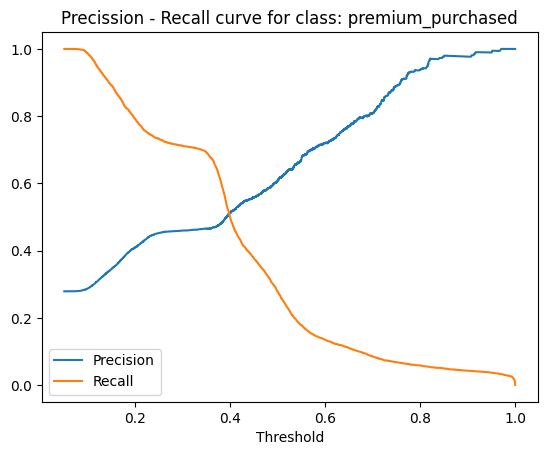

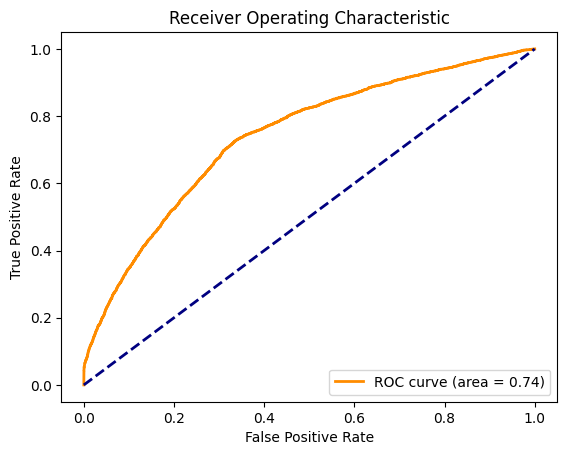

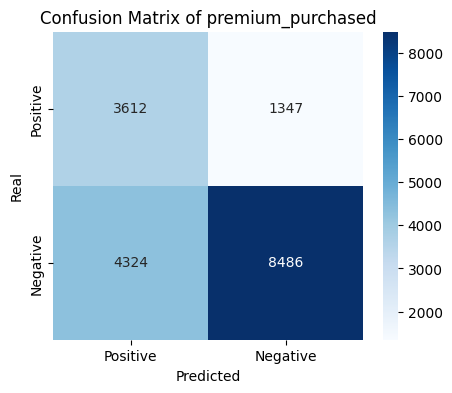


Optimal threshold: 0.26891035

Class: premium_purchased_this_month
Accuracy: 0.9323540998367944
AUC: 0.7121172199490863
F1-score: 0.4714160070360598
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     16600
         1.0       0.49      0.46      0.47      1169

    accuracy                           0.93     17769
   macro avg       0.72      0.71      0.72     17769
weighted avg       0.93      0.93      0.93     17769



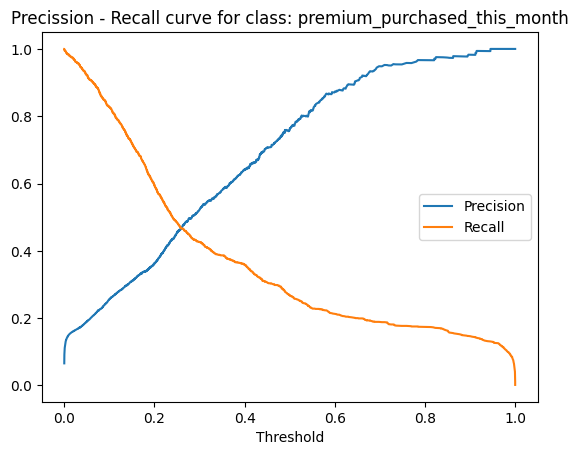

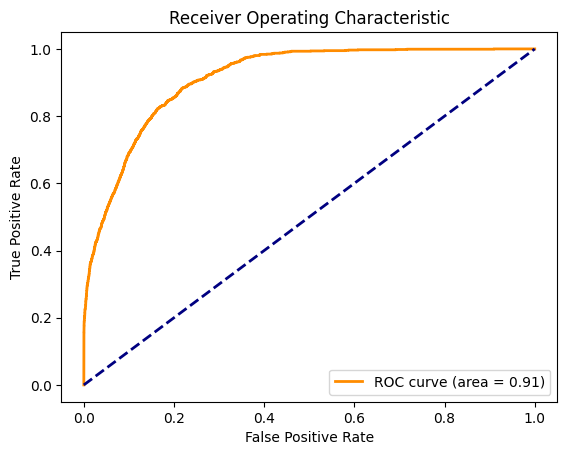

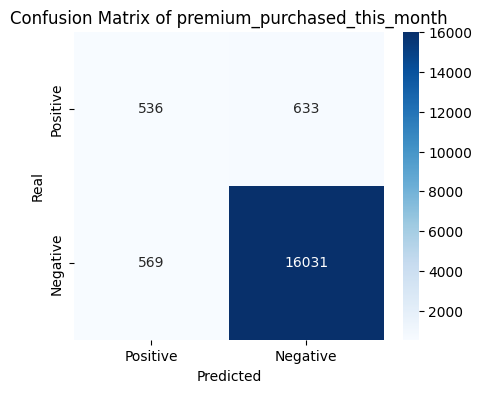

In [5]:
model = train_neural_network(best_params, X_train, y_train)

y_pred = model.predict(X_test)
print(y.shape)
print_classification_metrics(y_test, y_pred, TARGET)


Optimal threshold: 0.24556903651249015

Class: premium_purchased
Accuracy: 0.6858573920873431
AUC: 0.6928916884258887
F1-score: 0.5574056454170632
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.68      0.76     12810
         1.0       0.46      0.71      0.56      4959

    accuracy                           0.69     17769
   macro avg       0.66      0.69      0.66     17769
weighted avg       0.75      0.69      0.70     17769



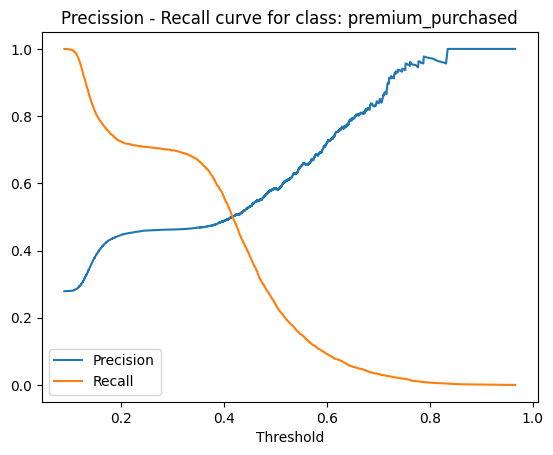

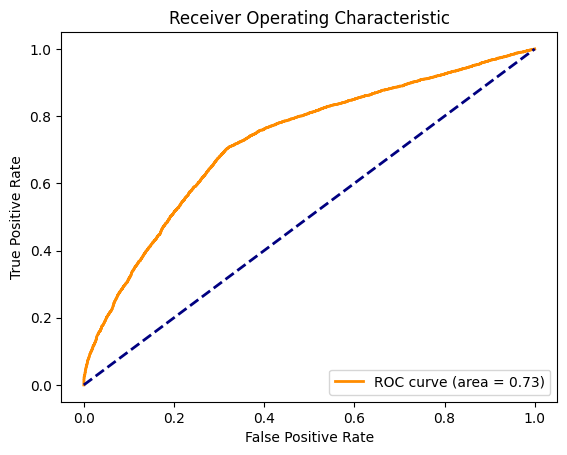

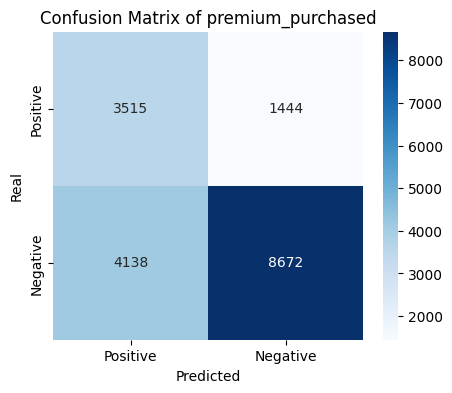


Optimal threshold: 0.1480092129801183

Class: premium_purchased_this_month
Accuracy: 0.8919466486577747
AUC: 0.6960570511300979
F1-score: 0.3642384105960265
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94     16600
         1.0       0.30      0.47      0.36      1169

    accuracy                           0.89     17769
   macro avg       0.63      0.70      0.65     17769
weighted avg       0.92      0.89      0.90     17769



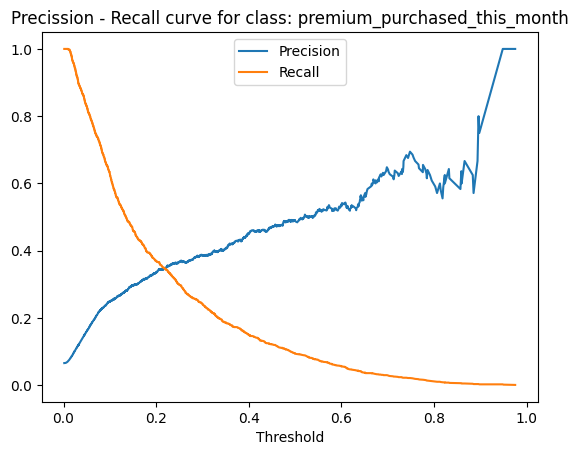

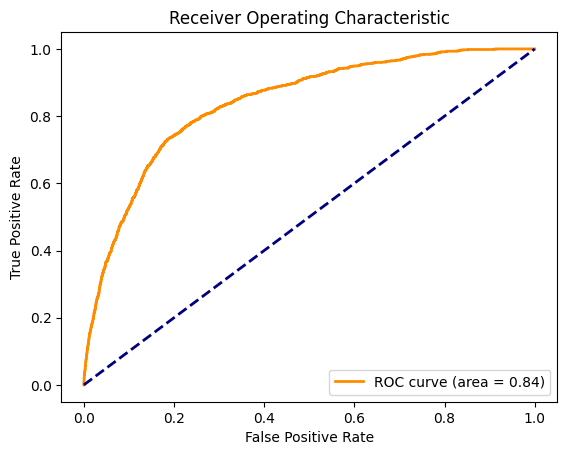

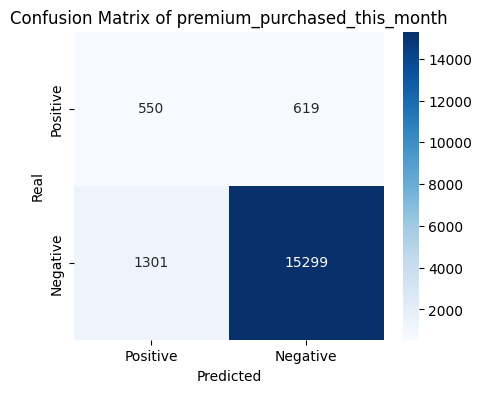

In [6]:
models = {}
for i, name in enumerate(TARGET):
    model = LogisticRegression()
    model.fit(X, y[:, i])
    models[name] = model

y_pred = []
for name in TARGET:
    y_pred.append(models[name].predict_proba(X_test)[:, 1])


y_pred = np.array(y_pred).T

print_classification_metrics(y_test, y_pred, TARGET)